odict_keys(['carAd'])
              Genmodel     Color  Bodytype  Runned_Miles  Engin_size  \
Genmodel      1.000000 -0.067439  0.278816      0.158352   -0.154546   
Color        -0.067439  1.000000 -0.016791     -0.115552   -0.030230   
Bodytype      0.278816 -0.016791  1.000000     -0.012552   -0.658575   
Runned_Miles  0.158352 -0.115552 -0.012552      1.000000    0.428799   
Engin_size   -0.154546 -0.030230 -0.658575      0.428799    1.000000   
Gearbox      -0.497505  0.046886 -0.220842     -0.030965    0.050809   
Fuel_type    -0.005473  0.010972  0.253007     -0.226506   -0.518542   
Price         0.220668  0.027777  0.136973     -0.723859   -0.443497   
Seat_num      0.704112 -0.108369  0.358184      0.251443    0.067771   
Door_num      0.250648 -0.043184  0.897653     -0.013753   -0.601296   

               Gearbox  Fuel_type     Price  Seat_num  Door_num  
Genmodel     -0.497505  -0.005473  0.220668  0.704112  0.250648  
Color         0.046886   0.010972  0.027777 -0.108369

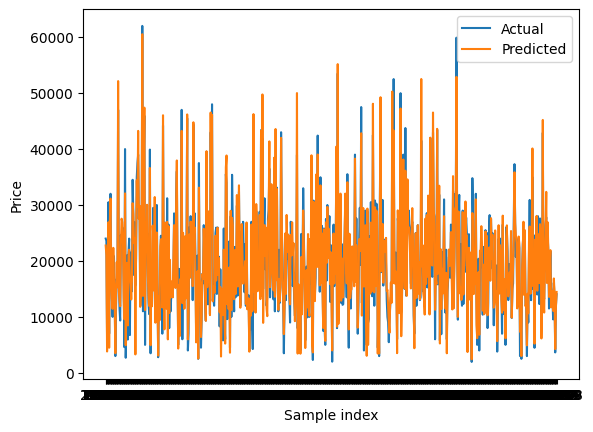

The R-Squared value is: 0.9035258657868396
NEW MODEL IS FOLLOWING. DOOR_NUM VARIABLE IS DROPPED IN THE FOLLOWING MODEL. REST IS SAME
Mean squared error: 9913070.49
Mean absolute error: 2307.68


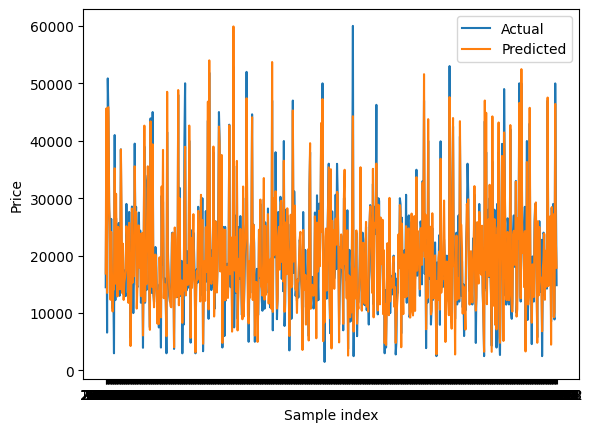

The R-Squared value is: 0.9017603198615336


In [6]:
""" 
Final Version
Final_Project_ Topic_2: Extremely Randomized Tree Model application on provided dataset
December 7th, 2022
Alok Dahal

"""

# importing all required packages and libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import pyreadr
import pandas as pd

# getting the data
data= (pyreadr.read_r("car_ads_fp.RData"))

# getting list of keys in the dictionary
print(data.keys())

# Creating the data frame
df = data["carAd"]

# Step 1:  Cleaning of the data

# Getting rid of NaN and None values
df= df.dropna()

# Filtering vehicles with "CX-5", "L200", "Q3","XC90" model names, as per our problem objective.
mask = df["Genmodel"].isin(["CX-5", "L200", "Q3","XC90"])
filtered_df = df.loc[mask,:]
df = filtered_df

# Filtering vehicles that use "Diesel", "Petrol" fuel types only, as per our problem objective.
mask2 = df["Fuel_type"].isin(["Diesel", "Petrol"])
filtered_df2 = df.loc[mask2,:]
df = filtered_df2


# Filtering vehicles with SUV and Pickup body type, as per our problem objective.
mask3 = df["Bodytype"].isin(["SUV", "Pickup"])
filtered_df3 = df.loc[mask3,:]
df= filtered_df3

# This gives top six colors of vehicles
# df['Color'].valuecounts()

#Filtering vehicles with top six most popular vehicle colors, as per our problem objective.
mask4 = df["Color"].isin(["Black","White", "Grey", "Silver", "Blue", "Red"])
filtered_df4 = df.loc[mask4,:]
df= filtered_df4

# Dropping independent variables that I deemed irrelevant or too hectic to encode, complicating our model
df = df.drop(['Adv_ID','Adv_year','Adv_month','Reg_year','Genmodel_ID', 'Maker'], axis=1)
df['Price'] = df['Price'].astype(int)
df['Runned_Miles'] = df['Runned_Miles'].astype(float)


# Converting all the remaining columns to numeric type
label_encoder = LabelEncoder()
columns_to_encode = ['Genmodel', 'Color', 'Bodytype', 'Engin_size','Gearbox', 'Fuel_type']
df[columns_to_encode]= df[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))

# Step2: Data Exploration: Exploring the correlation matrix. 

print(df.corr())
print("STRONG CORRELATION BETWEEN Door_num and Bodytype is seen.")

# To review the data frame:
# df

# Step 3:  Applying Extra Tree model

print(" EXTRA TREE MODEL: ")

# split data into training and testing sets
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create and fit a RandomForestRegressor model
model = ExtraTreesRegressor(random_state=0)
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")

# make predictions on the test data
y_pred = model.predict(X_test)

# create a line plot to compare the actual and predicted values
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.xlabel("Sample index")
plt.ylabel("Price")
plt.legend()
plt.show()

# compute the R^2 score
r2 = model.score(X_test, y_test)

print(f'The R-Squared value is: {r2}')  # prints the R^2 value for the model


################# FOLLOWING IS AN EXTRA STEP JUST TO VERIFY MODEL ROBUSTNESS ############################

print ("NEW MODEL IS FOLLOWING. DOOR_NUM VARIABLE IS DROPPED IN THE FOLLOWING MODEL TO AVOID MULTICOLLINEARITY. REST IS THE SAME")
# Trying out new model by dropping "Door_num" variable because it looks closely correlated to "Body_type" 
# Despite our model already looks good this step is just to check if we can make it better.

#creating new dataframe to maintian the original structure of df. All the following edits will be on this new df2 new
df2 = df 

#dropping "Door_num" variable
df2 = df2.drop(['Door_num'], axis=1)

#creating a new Extra Tree model out of df2
# split data into training and testing sets
T = df2.drop('Price', axis=1)
u = df2['Price']
T_train, T_test, u_train, u_test = train_test_split(T, u, test_size=0.2)

# create and fit a RandomForestRegressor model
model2 = ExtraTreesRegressor(random_state=0)
model2.fit(T_train, u_train)

# make predictions on the test data
u_pred = model2.predict(T_test)

# evaluate the model performance
mse2 = mean_squared_error(u_test, u_pred)
mae2 = mean_absolute_error(u_test, u_pred)
print(f"Mean squared error: {mse2:.2f}")
print(f"Mean absolute error: {mae2:.2f}")

# make predictions on the test data
u_pred = model2.predict(T_test)

# create a line plot to compare the actual and predicted values
plt.plot(u_test, label="Actual")
plt.plot(u_pred, label="Predicted")
plt.xlabel("Sample index")
plt.ylabel("Price")
plt.legend()
plt.show()

# compute the R^2 score
r2_2 = model2.score(T_test, u_test)

print(f'The R-Squared value is: {r2_2}')  # prints the R^2 value for the model
